## IMPORT RELEVANT LIBRARIES

In [1]:
import pyodbc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATABASE CONNECTION

In [2]:
db_path = r"C:\Users\GILBERT FG\Desktop\Readings\PSP_database.accdb"

conn = pyodbc.connect(
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    rf"DBQ={db_path};"
)

cursor = conn.cursor()

# read all tables
for table in cursor.tables(tableType='TABLE'):
    print(table.table_name)

Block register
Plot monitoring history
Plot-block relation
PSPs
Slope correction factors
Thinning history
TreeData


## DATA EXTRACTION AND AMALGAMATION

In [3]:
query_blk = r"SELECT * FROM [Block register]"

blk_register = pd.read_sql(query_blk, conn)
blk_register.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_15000\1003375522.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blk_register = pd.read_sql(query_blk, conn)


,PLANTATION,BLOCK,STATUS,ROTATION,OWNERSHIP,RESERVE,YEAR PLANTED,BLOCK AREA (ha),PRODUCTIVE,UNPRODUCTIVE,TEAK,NATURAL INDIGENOUS,PLANTED INDIGENOUS,GMELINA,OPEN LAND,ROCK,REMARK
0,Akumadan,2A,PLANTED,1,FORM GHANA,ASUBIMA,2008,77.853644,77.853644,0.00,77.853644,NaN,NaN,NaN,NaN,NaN,None
1,Akumadan,2B,PLANTED,1,FORM GHANA,ASUBIMA,2010,4.523337,4.523337,NaN,4.523337,NaN,NaN,NaN,NaN,NaN,None
2,Akumadan,4,PLANTED,1,FORM GHANA,ASUBIMA,2009,42.605816,42.605816,0.00,42.605816,NaN,NaN,NaN,NaN,NaN,None
3,Akumadan,5,PLANTED,1,FORM GHANA,ASUBIMA,2009,63.458447,62.918447,0.54,62.918447,NaN,NaN,NaN,NaN,0.54,None
4,Akumadan,6,PLANTED,1,FORM GHANA,ASUBIMA,2009,78.999204,78.999204,0.00,78.999204,NaN,NaN,NaN,NaN,NaN,None


In [4]:
blk_df = blk_register[['PLANTATION', 'BLOCK', 'RESERVE', 'YEAR PLANTED', 'PRODUCTIVE', 'TEAK']]

In [5]:
blk_df.head()

,PLANTATION,BLOCK,RESERVE,YEAR PLANTED,PRODUCTIVE,TEAK
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644
1,Akumadan,2B,ASUBIMA,2010,4.523337,4.523337
2,Akumadan,4,ASUBIMA,2009,42.605816,42.605816
3,Akumadan,5,ASUBIMA,2009,62.918447,62.918447
4,Akumadan,6,ASUBIMA,2009,78.999204,78.999204


In [6]:
blk_df = blk_df.rename(columns={'PLANTATION': 'Plantations', 'BLOCK': 'Block', 'RESERVE': 'Reserve', 'YEAR PLANTED': 'year_planted', 'PRODUCTIVE': 'Area_prod', 'TEAK': 'Area_teak'})

In [7]:
blk_df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644
1,Akumadan,2B,ASUBIMA,2010,4.523337,4.523337
2,Akumadan,4,ASUBIMA,2009,42.605816,42.605816
3,Akumadan,5,ASUBIMA,2009,62.918447,62.918447
4,Akumadan,6,ASUBIMA,2009,78.999204,78.999204


In [8]:
plt_blk_query = r"SELECT * FROM [Plot-block relation] WHERE AreaType = 'Teak'"

plt_blk = pd.read_sql(plt_blk_query, conn)

plt_blk.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_15000\2646592545.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  plt_blk = pd.read_sql(plt_blk_query, conn)


,RelationID,Plantations,Plot no,AreaType,Deviating plant year,Block,Start date,End date
0,74,Tain II,1370,Teak,NaN,PF80,2020-05-01,9999-12-31 00:00:00
1,76,Tain II,1372,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
2,77,Tain II,1366,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
3,78,Tain II,1363,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00
4,79,Tain II,1374,Teak,NaN,C17,2020-05-01,9999-12-31 00:00:00


In [9]:
plt_blk_df = plt_blk[['Plantations', 'Plot no', 'AreaType', 'Block']]
plt_blk_df.head()

,Plantations,Plot no,AreaType,Block
0,Tain II,1370,Teak,PF80
1,Tain II,1372,Teak,C17
2,Tain II,1366,Teak,C17
3,Tain II,1363,Teak,C17
4,Tain II,1374,Teak,C17


In [10]:
# merge block with plot-block relation
df = pd.merge(blk_df, plt_blk_df, on=['Plantations', 'Block'])
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,Plot no,AreaType
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,666,Teak
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,4,Teak
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,5,Teak
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,8,Teak


In [11]:
df = df.rename(columns={'Plot no': 'plot_id'})
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,666,Teak
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,4,Teak
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,5,Teak
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,8,Teak


In [12]:
tree_query = r"SELECT * FROM TreeData WHERE AreaType = 'Teak'"

tree_data = pd.read_sql(tree_query, conn)
tree_data.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_15000\616845433.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tree_data = pd.read_sql(tree_query, conn)


,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,PLOT,TREE NR,Tree SPECIES,Species scientific name,H (m),DBH (cm),Merchantable height (m),REMARKS,Incorrect DBH,Incorrect H,Incorrect H / DBH,Exclude,Justification for exclusion
0,Tain II,Teak,2018.0,1.0,13,1,71.0,Teak,Tectona grandis,7.25,12.0,None,Fire scars,False,False,None,False,None
1,Tain II,Teak,2018.0,1.0,13,1,76.0,Teak,Tectona grandis,8.25,12.0,None,Fire scars,False,False,None,False,None
2,Tain II,Teak,2018.0,1.0,13,1,68.0,Teak,Tectona grandis,7.00,11.8,None,Fire scars,False,False,None,False,None
3,Tain II,Teak,2018.0,1.0,13,1,53.0,Teak,Tectona grandis,7.25,11.5,None,Fire scars,False,False,None,False,None
4,Tain II,Teak,2018.0,1.0,13,1,58.0,Teak,Tectona grandis,7.00,10.5,None,Fire scars,False,False,None,False,None


In [13]:
tree_df = tree_data[['Plantations', 'AreaType', 'Monitoring year', 'Monitoring month', 'Monitoring day', 'PLOT', 'TREE NR', 'Tree SPECIES', 'H (m)', 'DBH (cm)', 'REMARKS']]
tree_df.head()

,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,PLOT,TREE NR,Tree SPECIES,H (m),DBH (cm),REMARKS
0,Tain II,Teak,2018.0,1.0,13,1,71.0,Teak,7.25,12.0,Fire scars
1,Tain II,Teak,2018.0,1.0,13,1,76.0,Teak,8.25,12.0,Fire scars
2,Tain II,Teak,2018.0,1.0,13,1,68.0,Teak,7.00,11.8,Fire scars
3,Tain II,Teak,2018.0,1.0,13,1,53.0,Teak,7.25,11.5,Fire scars
4,Tain II,Teak,2018.0,1.0,13,1,58.0,Teak,7.00,10.5,Fire scars


In [14]:
tree_df = tree_df.rename(columns={'PLOT': 'plot_id', 'TREE NR': 'tree_id', 'Tree SPECIES': 'species', 'H (m)': 'height_m', 'DBH (cm)': 'dbh_cm' })
tree_df.head()

,Plantations,AreaType,Monitoring year,Monitoring month,Monitoring day,plot_id,tree_id,species,height_m,dbh_cm,REMARKS
0,Tain II,Teak,2018.0,1.0,13,1,71.0,Teak,7.25,12.0,Fire scars
1,Tain II,Teak,2018.0,1.0,13,1,76.0,Teak,8.25,12.0,Fire scars
2,Tain II,Teak,2018.0,1.0,13,1,68.0,Teak,7.00,11.8,Fire scars
3,Tain II,Teak,2018.0,1.0,13,1,53.0,Teak,7.25,11.5,Fire scars
4,Tain II,Teak,2018.0,1.0,13,1,58.0,Teak,7.00,10.5,Fire scars


In [15]:
# merge tree data to dataframe
df = pd.merge(df, tree_df, on=['Plantations', 'AreaType', 'plot_id'])
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,Monitoring day,tree_id,species,height_m,dbh_cm,REMARKS
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.50,16.5,None
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,2.0,Teak,16.50,21.3,None
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,3.0,Teak,17.00,21.7,None
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,4.0,Teak,16.25,19.8,None
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,5.0,Teak,14.00,15.3,None


In [16]:
plt_hist_query = r"SELECT * FROM [Plot monitoring history] WHERE AreaType = 'Teak'"

plt_hist = pd.read_sql(plt_hist_query, conn)

plt_hist.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_15000\5572937.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  plt_hist = pd.read_sql(plt_hist_query, conn)


,MonitoringID,Plantations,Plot no,AreaType,Monitoring year,Monitoring Month,Monitoring day,Default plot size,Plot type,Monitoring team,Shrub cover (%),Herb cover (%),Invasive species cover (%),Erosion,Remarks,Excluded,Justification for exclusion,MDate
0,1,Akumadan,194,Teak,2020,2,24,800.0,Circular,"Samuel,John,Comfort & Miriam",NaN,NaN,NaN,False,None,False,None,2020-02-24
1,2,Akumadan,195,Teak,2020,2,25,800.0,Circular,"Alex,Samuel,John,Comfort & Miriam",NaN,NaN,NaN,False,None,False,None,2020-02-25
2,3,Akumadan,196,Teak,2020,2,25,800.0,Circular,"Alex,Samuel,John,Comfort & Miriam",NaN,NaN,NaN,False,None,False,None,2020-02-25
3,4,Akumadan,197,Teak,2020,2,28,800.0,Circular,"Alex,Samuel,John,Miriam & Comfort",NaN,NaN,NaN,False,None,False,None,2020-02-28
4,5,Akumadan,198,Teak,2020,2,28,800.0,Circular,"Alex,Samuel,John,Comfort & Miriam",NaN,NaN,NaN,False,None,False,None,2020-02-28


In [17]:
plt_hist_df = plt_hist[['Plantations', 'AreaType', 'Plot no', 'Default plot size']]
plt_hist_df.head()

,Plantations,AreaType,Plot no,Default plot size
0,Akumadan,Teak,194,800.0
1,Akumadan,Teak,195,800.0
2,Akumadan,Teak,196,800.0
3,Akumadan,Teak,197,800.0
4,Akumadan,Teak,198,800.0


In [18]:
plt_hist_df = plt_hist_df.rename(columns={'Plot no': 'plot_id', 'Default plot size': 'plot_size_m2'})
plt_hist_df.head()

,Plantations,AreaType,plot_id,plot_size_m2
0,Akumadan,Teak,194,800.0
1,Akumadan,Teak,195,800.0
2,Akumadan,Teak,196,800.0
3,Akumadan,Teak,197,800.0
4,Akumadan,Teak,198,800.0


In [19]:
# merge plot monitoring history to the dataframe
df = pd.merge(df, plt_hist_df, on=['Plantations', 'AreaType', 'plot_id'])
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,Monitoring day,tree_id,species,height_m,dbh_cm,REMARKS,plot_size_m2
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,2.0,Teak,16.5,21.3,None,800.0
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,2.0,Teak,16.5,21.3,None,800.0
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,3.0,Teak,17.0,21.7,None,800.0


In [20]:
thin_hist_query = r"SELECT * FROM [Thinning history] WHERE AreaType = 'Teak'"

thin_hist = pd.read_sql(thin_hist_query, conn)
thin_hist.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_15000\3473780868.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  thin_hist = pd.read_sql(thin_hist_query, conn)


,ID,Plantation,Block,AreaType,Year thinning,Target density,Final density,Thinning number,Commercial volume,Remarks
0,1,Akumadan,1A,Teak,2010.0,600.0,None,T1,0.00,felled to waste
1,2,Akumadan,1A,Teak,2012.0,450.0,None,T2,NaN,Info not available
2,3,Akumadan,1A,Teak,2015.0,250.0,None,T3,NaN,Info not available
3,4,Akumadan,1A-TH,Teak,2022.0,160.0,None,T4,283.38,None
4,5,Akumadan,20A,Teak,2014.0,450.0,None,T2,NaN,Info not available


In [21]:
thin_hist = thin_hist.rename(columns={'Plantation': 'Plantations'})
thin_hist.head()

,ID,Plantations,Block,AreaType,Year thinning,Target density,Final density,Thinning number,Commercial volume,Remarks
0,1,Akumadan,1A,Teak,2010.0,600.0,None,T1,0.00,felled to waste
1,2,Akumadan,1A,Teak,2012.0,450.0,None,T2,NaN,Info not available
2,3,Akumadan,1A,Teak,2015.0,250.0,None,T3,NaN,Info not available
3,4,Akumadan,1A-TH,Teak,2022.0,160.0,None,T4,283.38,None
4,5,Akumadan,20A,Teak,2014.0,450.0,None,T2,NaN,Info not available


In [22]:
thin_hist_df = thin_hist[['Plantations', 'Block', 'AreaType', 'Year thinning', 'Thinning number']]
thin_hist_df.head()

,Plantations,Block,AreaType,Year thinning,Thinning number
0,Akumadan,1A,Teak,2010.0,T1
1,Akumadan,1A,Teak,2012.0,T2
2,Akumadan,1A,Teak,2015.0,T3
3,Akumadan,1A-TH,Teak,2022.0,T4
4,Akumadan,20A,Teak,2014.0,T2


In [23]:
# merge thining history to the dataframe
df = pd.merge(df, thin_hist_df, on=['Plantations', 'Block', 'AreaType'])

## GRAND DATAFRAME

In [24]:
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,Monitoring day,tree_id,species,height_m,dbh_cm,REMARKS,plot_size_m2,Year thinning,Thinning number
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2022.0,T3
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2


## DATA CLEANSING AND TRANSFORMATION

In [25]:
df.shape

(4229303, 19)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229303 entries, 0 to 4229302
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Plantations       object 
 1   Block             object 
 2   Reserve           object 
 3   year_planted      int64  
 4   Area_prod         float64
 5   Area_teak         float64
 6   plot_id           object 
 7   AreaType          object 
 8   Monitoring year   float64
 9   Monitoring month  float64
 10  Monitoring day    int64  
 11  tree_id           float64
 12  species           object 
 13  height_m          float64
 14  dbh_cm            float64
 15  REMARKS           object 
 16  plot_size_m2      float64
 17  Year thinning     float64
 18  Thinning number   object 
dtypes: float64(9), int64(2), object(8)
memory usage: 613.1+ MB


In [27]:
df.isna().sum()

Plantations               0
Block                     0
Reserve                   0
year_planted              0
Area_prod                 0
Area_teak                 0
plot_id                   0
AreaType                  0
Monitoring year           0
Monitoring month          0
Monitoring day            0
tree_id                  54
species                 995
height_m               2375
dbh_cm                 6483
REMARKS             2842071
plot_size_m2              0
Year thinning             0
Thinning number           0
dtype: int64

In [28]:
df = df.dropna(subset=['height_m', 'dbh_cm'])

In [29]:
df.isna().sum()

Plantations               0
Block                     0
Reserve                   0
year_planted              0
Area_prod                 0
Area_teak                 0
plot_id                   0
AreaType                  0
Monitoring year           0
Monitoring month          0
Monitoring day            0
tree_id                   0
species                 947
height_m                  0
dbh_cm                    0
REMARKS             2837816
plot_size_m2              0
Year thinning             0
Thinning number           0
dtype: int64

In [30]:
df.shape

(4222726, 19)

In [31]:
df['species'].unique()

array(['Teak', 'Akonkodie', 'Watapuo', 'Akuakuo-Ninsuo',
       'Unknown indigenous', 'Okoro', 'Onyina', 'Foto', 'Konkroma',
       'Albizia', 'Mahogany', 'Khaya ivorensis', 'Odum', 'Nyankyerene',
       'Trilepisium madagascariense', 'Dead', 'Akye', 'onyono',
       'Awiemfosamina', 'kotrenfro', 'Ofram', 'Kyenkyen', 'Cedrela', None,
       'Cassia', 'Acacia', 'Acasia', 'Wawa', 'Asanfena', 'Kane',
       'Albizia adianthifolia', 'Sofo', 'Hontan',
       'Tetrapleura tetraptera', 'prekese', 'Prekese', 'Afzelia',
       'kwakuanisuo', 'coconisuol', 'Kookonisuo', 'Mango', 'Wonton',
       'Nofotene', 'Kigelia africana', 'Hyedua', 'Nyamedua', 'Otie',
       'Kotreamfo', 'Womba', 'Alstonia boonei', 'Anacardium occidentale',
       'Wama', 'Kusia', 'Funtumia africana', 'Okure', 'York'],
      dtype=object)

In [32]:
species = set(df['species'])
teak = 'Teak'

for i in species:
    if i != teak:
        df = df[~((df['species'] == i))]


In [33]:
df['species'].unique()

array(['Teak', None], dtype=object)

In [34]:
df.shape

(4196018, 19)

In [35]:
df['REMARKS'].unique()

array([None, '', 'Wildling', 'Coppice',
       'Diameter taken with diameter tape - Wildling - marked',
       'Diameter taken with diameter tape',
       'Diameter taken with diameter tape - marked',
       'Outside planting line - Wildling', 'Dead', 'Top dead',
       'Broken top',
       'diseased - dead tree - Diameter taken with diameter tape',
       'diseased - Diameter taken with diameter tape',
       'Diameter taken with diameter tape - Wildling',
       'Diameter taken with diameter tape - Coppice',
       'Diameter taken with diameter tape - Coppice - marked',
       'Beside a termite mould', 'Dying', 'marked',
       'leaves eaten by grasshoppers', 'Top broken - Wildling',
       'Diameter taken with diameter tape - Coppice - dead tree',
       'Diameter taken with diameter tape - dead tree',
       'Diameter taken with diameter tape - Wildling - dead tree',
       'half dead', 'Double stem', 'Tape', 'Tape - marked', 'Top broken',
       'Dead,Top broken', 'Marked', 'dead/

In [36]:
import re

pattern = r"(Wildling|Coppice|Broken top|diseased|dead|Top broken|coppice|wildling|fork|Beetle|Old|dieback|Diseased|Broken|Abnormal|crooked|marked)"

remarks = set(df['REMARKS'])

for i in remarks:
    if i is not None and re.search(pattern, i, re.IGNORECASE):
        df = df[~((df['REMARKS'] == i))]

In [37]:
df['REMARKS'].unique()

array([None, '', 'Diameter taken with diameter tape',
       'Beside a termite mould', 'Dying', 'leaves eaten by grasshoppers',
       'Double stem', 'Tape',
       'Diameter < 0. Diameter taken with diameter tape',
       'towards bumgate 2', 'Diameter taken with caliper',
       'Strange H/D. DBH assumed to be 15,2 instead of 5,2', '2 stems',
       'Black ant attack from base to top',
       'D above 1.3. Diameter taken with diameter tape',
       'D above 1.3. Diameter taken diameter tape',
       'DBH missing on field sheet. Assumed to be 12.6 corresponding the other trees in the plot',
       'DBH incorrect on field sheet. Was 4, but assumed to be 14',
       'Strange H/D. DBH assumed to be 14.9 instead of 4.9',
       'Dying. Diameter taken with caliper', 'Beaten-up', 'Hung up',
       'Diameter taken with diameter tape; monitoring day unknown',
       '3 stems', 'Beaten-up. Top slashed',
       'One tree on  the boundary not actually in the plot',
       '2 trees outside plot f

In [38]:
df.shape

(3908949, 19)

In [39]:
df.isna().sum()

Plantations               0
Block                     0
Reserve                   0
year_planted              0
Area_prod                 0
Area_teak                 0
plot_id                   0
AreaType                  0
Monitoring year           0
Monitoring month          0
Monitoring day            0
tree_id                   0
species                 944
height_m                  0
dbh_cm                    0
REMARKS             2827365
plot_size_m2              0
Year thinning             0
Thinning number           0
dtype: int64

In [40]:
df['Age'] = df['Monitoring year'] - df['year_planted']
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,Monitoring day,tree_id,species,height_m,dbh_cm,REMARKS,plot_size_m2,Year thinning,Thinning number,Age
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13.0
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13.0
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2022.0,T3,13.0
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13.0
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021.0,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13.0


In [41]:
df['Age'] = df['Age'].astype(int)
df['Monitoring year'] = df['Monitoring year'].astype(int)
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,Monitoring day,tree_id,species,height_m,dbh_cm,REMARKS,plot_size_m2,Year thinning,Thinning number,Age
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2022.0,T3,13
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13


## DATA ANALYSIS

#### BASIC STATISTICS

##### 1. Nha - Stand density (#trees/ha)

In [42]:
# remove trees with age less than 3 years
df = df[~((df['Age'] < 3.0))]

In [43]:
data = df.groupby(['Plantations','year_planted', 'Monitoring year', 'Age', 'plot_id'])['tree_id'].nunique().reset_index(name="#trees")

In [44]:
data.head()

,Plantations,year_planted,Monitoring year,Age,plot_id,#trees
0,Akumadan,2001,2009,8,11,12
1,Akumadan,2001,2009,8,12,18
2,Akumadan,2001,2009,8,13,6
3,Akumadan,2001,2009,8,14,16
4,Akumadan,2001,2009,8,15,14


In [45]:
data['Nha'] = data['#trees'] * 10000 / df['plot_size_m2']

data.head()

,Plantations,year_planted,Monitoring year,Age,plot_id,#trees,Nha
0,Akumadan,2001,2009,8,11,12,150.0
1,Akumadan,2001,2009,8,12,18,225.0
2,Akumadan,2001,2009,8,13,6,75.0
3,Akumadan,2001,2009,8,14,16,200.0
4,Akumadan,2001,2009,8,15,14,175.0


In [46]:
# compute margin of error
from scipy import stats

def margin_of_error(series, confidence=0.95):
    mean = series.mean()
    std = series.std(ddof=1)
    n = series.count()
    se = std / np.sqrt(n)
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)
    moe = t_critical * se
    return moe

In [47]:
# compute margin of errors for stand density (Nha)
moe = data.groupby(['Plantations', 'year_planted', 'Monitoring year', 'Age'])['Nha'].apply(margin_of_error).reset_index(name="+/-Nha")
moe.head()

,Plantations,year_planted,Monitoring year,Age,+/-Nha
0,Akumadan,2001,2009,8,62.315994
1,Akumadan,2001,2010,9,56.269717
2,Akumadan,2001,2011,10,44.485118
3,Akumadan,2001,2012,11,32.503020
4,Akumadan,2001,2013,12,71.709278


In [48]:
sd = data
sd = pd.merge(sd, moe, on=['Plantations', 'year_planted', 'Monitoring year', 'Age'])
sd.head()

,Plantations,year_planted,Monitoring year,Age,plot_id,#trees,Nha,+/-Nha
0,Akumadan,2001,2009,8,11,12,150.0,62.315994
1,Akumadan,2001,2009,8,12,18,225.0,62.315994
2,Akumadan,2001,2009,8,13,6,75.0,62.315994
3,Akumadan,2001,2009,8,14,16,200.0,62.315994
4,Akumadan,2001,2009,8,15,14,175.0,62.315994


In [49]:
ed = sd.groupby(['Plantations', 'year_planted', 'Monitoring year', 'Age', '+/-Nha'])['Nha'].mean().reset_index()

In [50]:
ed.head()

,Plantations,year_planted,Monitoring year,Age,+/-Nha,Nha
0,Akumadan,2001,2009,8,62.315994,177.083333
1,Akumadan,2001,2010,9,56.269717,212.500000
2,Akumadan,2001,2011,10,44.485118,118.750000
3,Akumadan,2001,2012,11,32.503020,108.928571
4,Akumadan,2001,2013,12,71.709278,385.714286


In [51]:
sd = ed[['Plantations', 'year_planted', 'Monitoring year', 'Age', 'Nha', '+/-Nha']]
sd.head()

,Plantations,year_planted,Monitoring year,Age,Nha,+/-Nha
0,Akumadan,2001,2009,8,177.083333,62.315994
1,Akumadan,2001,2010,9,212.500000,56.269717
2,Akumadan,2001,2011,10,118.750000,44.485118
3,Akumadan,2001,2012,11,108.928571,32.503020
4,Akumadan,2001,2013,12,385.714286,71.709278


In [52]:
plot_means = data.groupby(['Plantations', 'year_planted','Age','plot_id'])['Nha'].mean().reset_index()
plot_means.head()

,Plantations,year_planted,Age,plot_id,Nha
0,Akumadan,2001,8,11,150.0
1,Akumadan,2001,8,12,225.0
2,Akumadan,2001,8,13,75.0
3,Akumadan,2001,8,14,200.0
4,Akumadan,2001,8,15,175.0


### 2021 Monitoring Year - Plotting the stand density per hectare

In [53]:
dd_2021 = data[(data['Monitoring year'] == 2021)]

In [54]:
dd_2021.head()

,Plantations,year_planted,Monitoring year,Age,plot_id,#trees,Nha
98,Akumadan,2001,2021,20,11,14,175.0
99,Akumadan,2001,2021,20,12,23,287.5
100,Akumadan,2001,2021,20,13,14,175.0
101,Akumadan,2001,2021,20,14,22,275.0
102,Akumadan,2001,2021,20,15,23,287.5


In [55]:
dd_2021 = dd_2021.groupby(['Plantations', 'year_planted', 'Age'])['Nha'].mean().reset_index()
dd_2021.head()

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,20,223.611111
1,Akumadan,2006,15,225.961538
2,Akumadan,2008,13,460.227273
3,Akumadan,2009,12,NaN
4,Akumadan,2010,11,NaN


In [56]:
dd_2021 = dd_2021.dropna(subset=['Nha'])

In [57]:
dd_2021.head()

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,20,223.611111
1,Akumadan,2006,15,225.961538
2,Akumadan,2008,13,460.227273
5,Akumadan,2011,10,898.706897
6,Akumadan,2012,9,897.125000


In [58]:
dd_2021['Nha'] = dd_2021['Nha'].astype(int)
dd_2021.head()

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,20,223
1,Akumadan,2006,15,225
2,Akumadan,2008,13,460
5,Akumadan,2011,10,898
6,Akumadan,2012,9,897


In [59]:
dd_2021

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,20,223
1,Akumadan,2006,15,225
2,Akumadan,2008,13,460
5,Akumadan,2011,10,898
6,Akumadan,2012,9,897
7,Tain II,2013,8,1106
8,Tain II,2014,7,1051
9,Tain II,2015,6,938
10,Tain II,2016,5,1210
11,Tain II,2017,4,1276


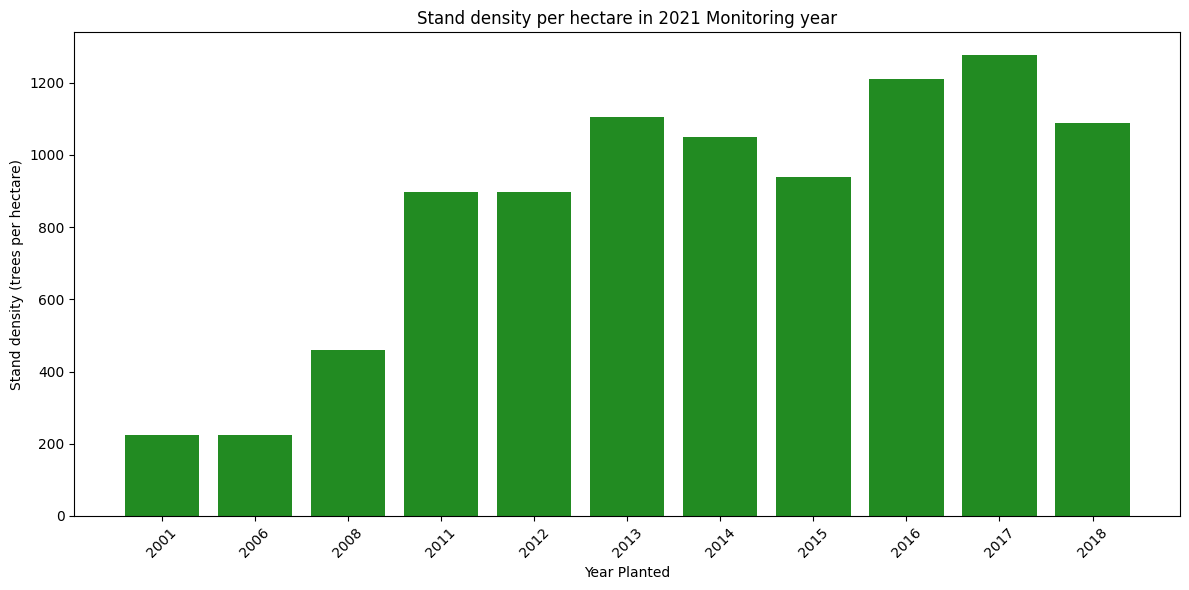

In [60]:
plt.figure(figsize=(12,6))
plt.bar(dd_2021['year_planted'].astype(str), dd_2021['Nha'], color='forestgreen')
plt.xlabel('Year Planted')
plt.ylabel('Stand density (trees per hectare)')
plt.title('Stand density per hectare in 2021 Monitoring year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
dd_2023 = data[(data['Monitoring year'] == 2023)]
dd_2023.head()

,Plantations,year_planted,Monitoring year,Age,plot_id,#trees,Nha
120,Akumadan,2001,2023,22,657,11,137.5
121,Akumadan,2001,2023,22,665,12,150.0
122,Akumadan,2001,2023,22,816,11,137.5
123,Akumadan,2001,2023,22,819,10,125.0
183,Akumadan,2006,2023,17,441,11,137.5


In [62]:
dd_2023.isna().sum()

Plantations          0
year_planted         0
Monitoring year      0
Age                  0
plot_id              0
#trees               0
Nha                178
dtype: int64

In [63]:
dd_2023 = dd_2023.dropna(subset=['Nha'])

In [64]:
dd_2023 = dd_2023.groupby(['Plantations', 'year_planted', 'Age'])['Nha'].mean().reset_index()
dd_2023.head()

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,22,137.500000
1,Akumadan,2006,17,203.125000
2,Akumadan,2008,15,260.795455
3,Akumadan,2011,12,644.672131
4,Akumadan,2012,11,666.125000


In [65]:
dd_2023['Nha'] = dd_2023['Nha'].astype(int)
dd_2023.head()

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,22,137
1,Akumadan,2006,17,203
2,Akumadan,2008,15,260
3,Akumadan,2011,12,644
4,Akumadan,2012,11,666


In [66]:
dd_2023

,Plantations,year_planted,Age,Nha
0,Akumadan,2001,22,137
1,Akumadan,2006,17,203
2,Akumadan,2008,15,260
3,Akumadan,2011,12,644
4,Akumadan,2012,11,666
5,Tain II,2013,10,840
6,Tain II,2014,9,1004
7,Tain II,2015,8,933
8,Tain II,2016,7,926
9,Tain II,2017,6,950


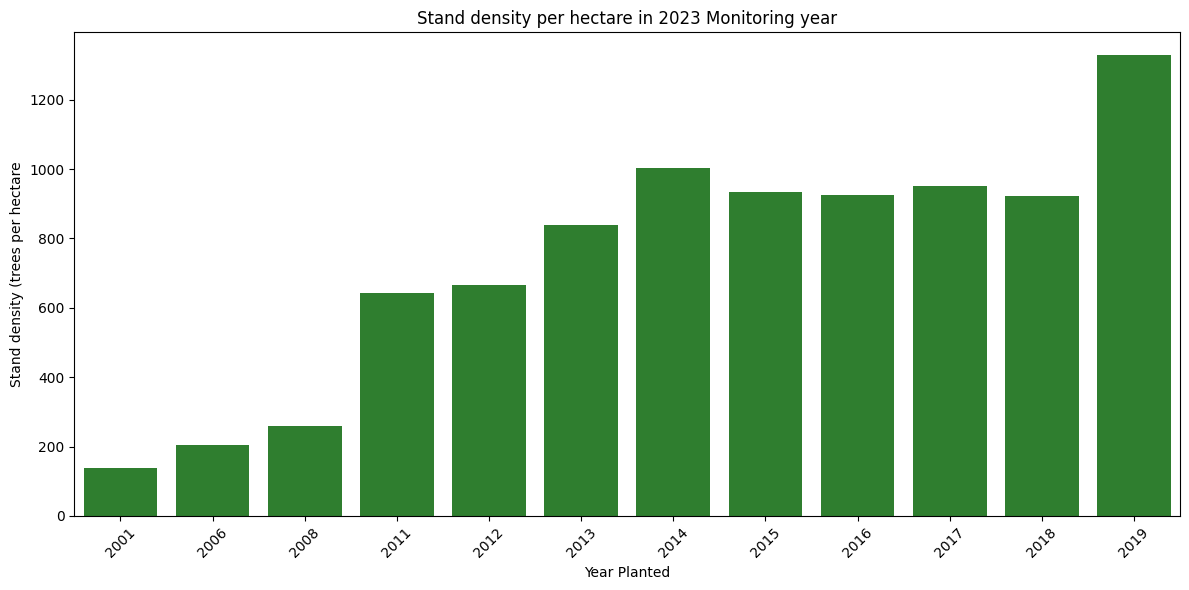

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=dd_2023, x='year_planted', y='Nha', color='forestgreen')
plt.xlabel('Year Planted')
plt.ylabel('Stand density (trees per hectare')
plt.title("Stand density per hectare in 2023 Monitoring year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dominant Height

In [68]:
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,Monitoring day,tree_id,species,height_m,dbh_cm,REMARKS,plot_size_m2,Year thinning,Thinning number,Age
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2022.0,T3,13
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,13,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13


In [69]:
def compute_dominant_height(group):
    plot_size = group['plot_size_m2'].iloc[0] / 10000
    n_trees = max(int(round(100 * plot_size)), 1)
    tallest = group.sort_values('dbh_cm', ascending=False).head(n_trees)

    return tallest['height_m'].mean()

dominant_heights = df.groupby(['Plantations', 'year_planted', 'Monitoring year', 'plot_id']).apply(compute_dominant_height).reset_index(name="Hd")
dominant_heights.head()

C:\Users\GILBERT FG\AppData\Local\Temp\ipykernel_15000\1435580067.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dominant_heights = df.groupby(['Plantations', 'year_planted', 'Monitoring year', 'plot_id']).apply(compute_dominant_height).reset_index(name="Hd")


,Plantations,year_planted,Monitoring year,plot_id,Hd
0,Akumadan,2001,2009,11,17.0
1,Akumadan,2001,2009,12,17.0
2,Akumadan,2001,2009,13,14.5
3,Akumadan,2001,2009,14,17.0
4,Akumadan,2001,2009,15,17.0


In [70]:
hd = dominant_heights.groupby(['Plantations', 'year_planted', 'Monitoring year'])['Hd'].mean().reset_index()
hd.head()

,Plantations,year_planted,Monitoring year,Hd
0,Akumadan,2001,2009,15.333333
1,Akumadan,2001,2010,10.100000
2,Akumadan,2001,2011,14.333333
3,Akumadan,2001,2012,17.460714
4,Akumadan,2001,2013,19.000000


In [71]:
sd.head()

,Plantations,year_planted,Monitoring year,Age,Nha,+/-Nha
0,Akumadan,2001,2009,8,177.083333,62.315994
1,Akumadan,2001,2010,9,212.500000,56.269717
2,Akumadan,2001,2011,10,118.750000,44.485118
3,Akumadan,2001,2012,11,108.928571,32.503020
4,Akumadan,2001,2013,12,385.714286,71.709278


In [72]:
result_df = pd.merge(sd, hd, on=['Plantations', 'year_planted', 'Monitoring year'])
result_df.head()

,Plantations,year_planted,Monitoring year,Age,Nha,+/-Nha,Hd
0,Akumadan,2001,2009,8,177.083333,62.315994,15.333333
1,Akumadan,2001,2010,9,212.500000,56.269717,10.100000
2,Akumadan,2001,2011,10,118.750000,44.485118,14.333333
3,Akumadan,2001,2012,11,108.928571,32.503020,17.460714
4,Akumadan,2001,2013,12,385.714286,71.709278,19.000000


In [73]:
hd_2020 = hd[(hd['Monitoring year'] == 2020)]
hd_2020

,Plantations,year_planted,Monitoring year,Hd
11,Akumadan,2001,2020,23.409722
39,Akumadan,2009,2020,15.626712
54,Akumadan,2011,2020,14.236936
67,Tain II,2013,2020,11.086617
77,Tain II,2015,2020,9.577922
82,Tain II,2016,2020,8.238676
87,Tain II,2017,2020,6.841964


In [74]:
mean_height = df.groupby(['Plantations', 'year_planted', 'Monitoring year', 'plot_id'])['height_m'].mean().reset_index(name="H(m)")
mean_height.head()

,Plantations,year_planted,Monitoring year,plot_id,H(m)
0,Akumadan,2001,2009,11,17.0
1,Akumadan,2001,2009,12,17.0
2,Akumadan,2001,2009,13,14.5
3,Akumadan,2001,2009,14,17.0
4,Akumadan,2001,2009,15,17.0


In [75]:
mean_height = mean_height.groupby(['Plantations', 'year_planted', 'Monitoring year'])['H(m)'].mean().reset_index()
mean_height.head()

,Plantations,year_planted,Monitoring year,H(m)
0,Akumadan,2001,2009,15.333333
1,Akumadan,2001,2010,7.690703
2,Akumadan,2001,2011,13.970014
3,Akumadan,2001,2012,15.901651
4,Akumadan,2001,2013,17.448709


In [76]:
mean_height_2020 = mean_height[(mean_height['Monitoring year'] == 2020)]
mean_height_2020

,Plantations,year_planted,Monitoring year,H(m)
11,Akumadan,2001,2020,22.363878
39,Akumadan,2009,2020,13.831227
54,Akumadan,2011,2020,12.725640
67,Tain II,2013,2020,10.086489
77,Tain II,2015,2020,7.793740
82,Tain II,2016,2020,6.482176
87,Tain II,2017,2020,4.980703


In [77]:
result_df.head()

,Plantations,year_planted,Monitoring year,Age,Nha,+/-Nha,Hd
0,Akumadan,2001,2009,8,177.083333,62.315994,15.333333
1,Akumadan,2001,2010,9,212.500000,56.269717,10.100000
2,Akumadan,2001,2011,10,118.750000,44.485118,14.333333
3,Akumadan,2001,2012,11,108.928571,32.503020,17.460714
4,Akumadan,2001,2013,12,385.714286,71.709278,19.000000


In [78]:
result_df = pd.merge(result_df, mean_height, on=['Plantations', 'year_planted', 'Monitoring year'])
result_df.head()

,Plantations,year_planted,Monitoring year,Age,Nha,+/-Nha,Hd,H(m)
0,Akumadan,2001,2009,8,177.083333,62.315994,15.333333,15.333333
1,Akumadan,2001,2010,9,212.500000,56.269717,10.100000,7.690703
2,Akumadan,2001,2011,10,118.750000,44.485118,14.333333,13.970014
3,Akumadan,2001,2012,11,108.928571,32.503020,17.460714,15.901651
4,Akumadan,2001,2013,12,385.714286,71.709278,19.000000,17.448709


In [79]:
mean_dbh = df.groupby(['Plantations', 'year_planted', 'Monitoring year', 'plot_id'])['dbh_cm'].mean().reset_index(name="DBH(cm)")
mean_dbh.head()

,Plantations,year_planted,Monitoring year,plot_id,DBH(cm)
0,Akumadan,2001,2009,11,19.297537
1,Akumadan,2001,2009,12,16.224962
2,Akumadan,2001,2009,13,16.021598
3,Akumadan,2001,2009,14,15.716551
4,Akumadan,2001,2009,15,15.915494


In [80]:
mean_dbh = mean_dbh.groupby(['Plantations', 'year_planted', 'Monitoring year'])['DBH(cm)'].mean().reset_index()
mean_dbh.head()

,Plantations,year_planted,Monitoring year,DBH(cm)
0,Akumadan,2001,2009,15.659466
1,Akumadan,2001,2010,15.076902
2,Akumadan,2001,2011,17.921766
3,Akumadan,2001,2012,19.792262
4,Akumadan,2001,2013,19.906985


In [81]:
result_df = pd.merge(result_df, mean_dbh, on=['Plantations', 'year_planted', 'Monitoring year'])
result_df.head()

,Plantations,year_planted,Monitoring year,Age,Nha,+/-Nha,Hd,H(m),DBH(cm)
0,Akumadan,2001,2009,8,177.083333,62.315994,15.333333,15.333333,15.659466
1,Akumadan,2001,2010,9,212.500000,56.269717,10.100000,7.690703,15.076902
2,Akumadan,2001,2011,10,118.750000,44.485118,14.333333,13.970014,17.921766
3,Akumadan,2001,2012,11,108.928571,32.503020,17.460714,15.901651,19.792262
4,Akumadan,2001,2013,12,385.714286,71.709278,19.000000,17.448709,19.906985


In [82]:
df['tree_ba_m2'] = np.pi * ((df['dbh_cm'] / 100)**2) / 4

In [83]:
df.head()

,Plantations,Block,Reserve,year_planted,Area_prod,Area_teak,plot_id,AreaType,Monitoring year,Monitoring month,...,tree_id,species,height_m,dbh_cm,REMARKS,plot_size_m2,Year thinning,Thinning number,Age,tree_ba_m2
0,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,...,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13,0.021382
1,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,...,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13,0.021382
2,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,...,1.0,Teak,16.5,16.5,None,800.0,2022.0,T3,13,0.021382
3,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,...,1.0,Teak,16.5,16.5,None,800.0,2013.0,T1,13,0.021382
4,Akumadan,2A,ASUBIMA,2008,77.853644,77.853644,667,Teak,2021,4.0,...,1.0,Teak,16.5,16.5,None,800.0,2018.0,T2,13,0.021382


In [84]:
df['plot_size_ha'] = df['plot_size_m2'] / 10000

In [85]:
plot_ba = df.groupby(['Plantations', 'year_planted', 'Monitoring year','plot_id']).agg({
    'tree_ba_m2': 'sum',
    'plot_size_ha': 'first'
}).reset_index()

plot_ba.head()

,Plantations,year_planted,Monitoring year,plot_id,tree_ba_m2,plot_size_ha
0,Akumadan,2001,2009,11,14.119548,0.02
1,Akumadan,2001,2009,12,15.371819,0.02
2,Akumadan,2001,2009,13,5.030808,0.02
3,Akumadan,2001,2009,14,13.409075,0.02
4,Akumadan,2001,2009,15,11.861659,0.02


In [86]:
plot_ba['basal_area_per_ha'] = plot_ba['tree_ba_m2'] / plot_ba['plot_size_ha']
plot_ba.head()

,Plantations,year_planted,Monitoring year,plot_id,tree_ba_m2,plot_size_ha,basal_area_per_ha
0,Akumadan,2001,2009,11,14.119548,0.02,705.977408
1,Akumadan,2001,2009,12,15.371819,0.02,768.590952
2,Akumadan,2001,2009,13,5.030808,0.02,251.540409
3,Akumadan,2001,2009,14,13.409075,0.02,670.453726
4,Akumadan,2001,2009,15,11.861659,0.02,593.082938


In [87]:
stand_ba = plot_ba.groupby(['Plantations', 'year_planted', 'Monitoring year'])['basal_area_per_ha'].mean().reset_index()
stand_ba.head()

,Plantations,year_planted,Monitoring year,basal_area_per_ha
0,Akumadan,2001,2009,558.431475
1,Akumadan,2001,2010,628.736264
2,Akumadan,2001,2011,472.488918
3,Akumadan,2001,2012,540.336153
4,Akumadan,2001,2013,1879.203566
